<a href="https://colab.research.google.com/github/Pratim38pal/Machine-Learning-Projects/blob/main/Time_Series_Forecasting_in_ML_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt



In [5]:
df = pd.read_csv('/content/gold_monthly_csv.csv')
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [6]:
df.shape

(847, 2)

In [7]:
df.describe()

,Price
count,847.000000
mean,416.556906
std,453.665313
min,34.490000
25%,35.190000
50%,319.622000
75%,447.029000
max,1840.807000


In [8]:
df.isnull().sum().sum()

0

In [9]:
print(f"Data range of gold price available from -{df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]}")

Data range of gold price available from -1950-01 to 2020-07


In [10]:
date=pd.date_range(df.loc[:,'Date'][0],df.loc[:,'Date'][len(df)-1])
date

DatetimeIndex(['1950-01-01', '1950-01-02', '1950-01-03', '1950-01-04',
               '1950-01-05', '1950-01-06', '1950-01-07', '1950-01-08',
               '1950-01-09', '1950-01-10',
               ...
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', length=25750, freq='D')

In [11]:
date=pd.date_range(start = '1/1/1950', end = '8/1/2020',freq='M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [12]:
df['month']=date
df.drop('Date',axis=1,inplace=True)
df=df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


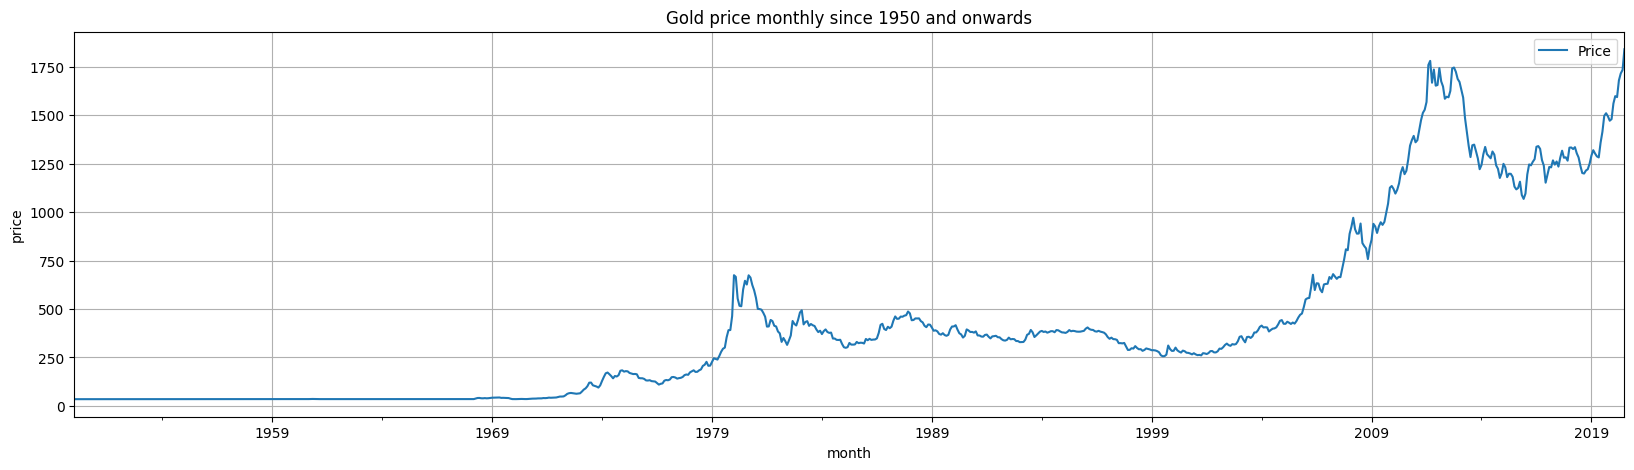

In [13]:
df.plot(figsize=(20,5))
plt.title('Gold price monthly since 1950 and onwards')
plt.xlabel('month')
plt.ylabel('price')
plt.grid()
plt.show()

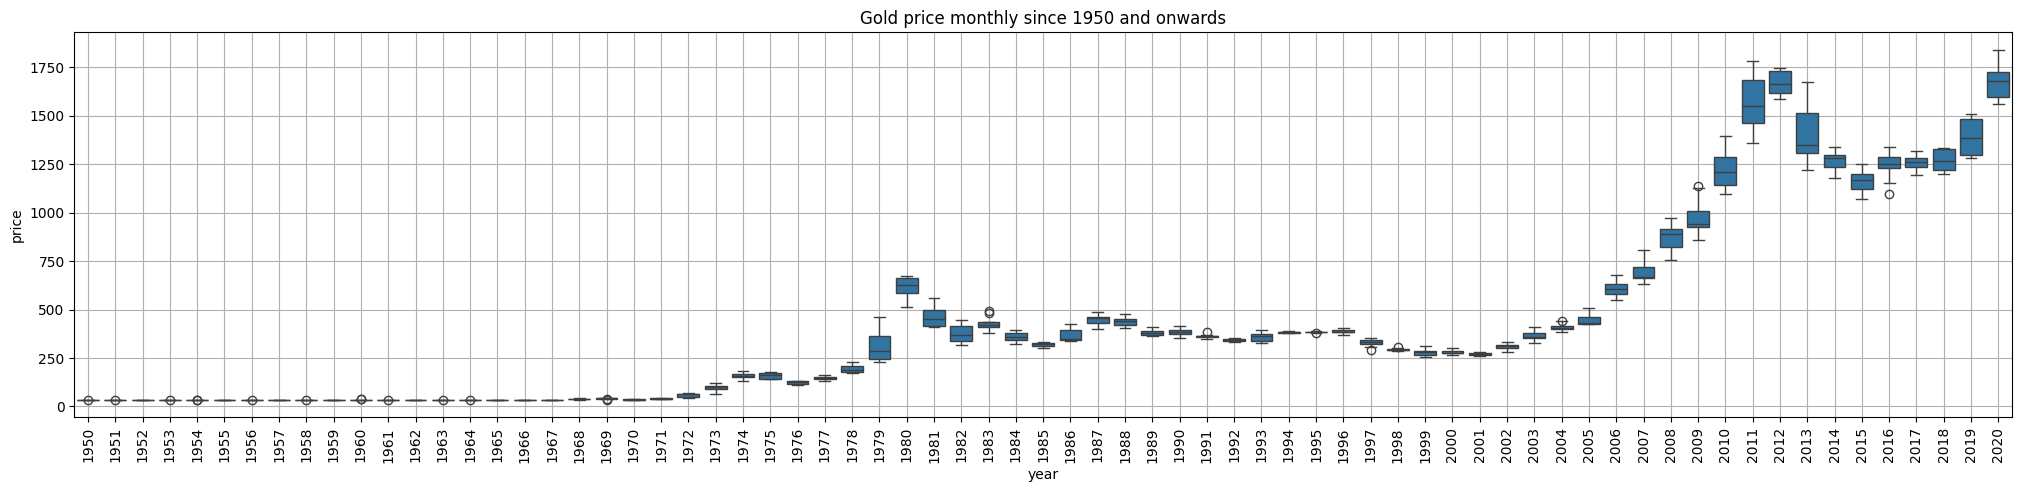

In [14]:
_, ax = plt.subplots(figsize=(25,5))
sns.boxplot(x=df.index.year,y=df.values[:,0],ax=ax)
plt.title('Gold price monthly since 1950 and onwards')
plt.xlabel('year')
plt.ylabel('price')
plt.xticks(rotation=90)
plt.grid()

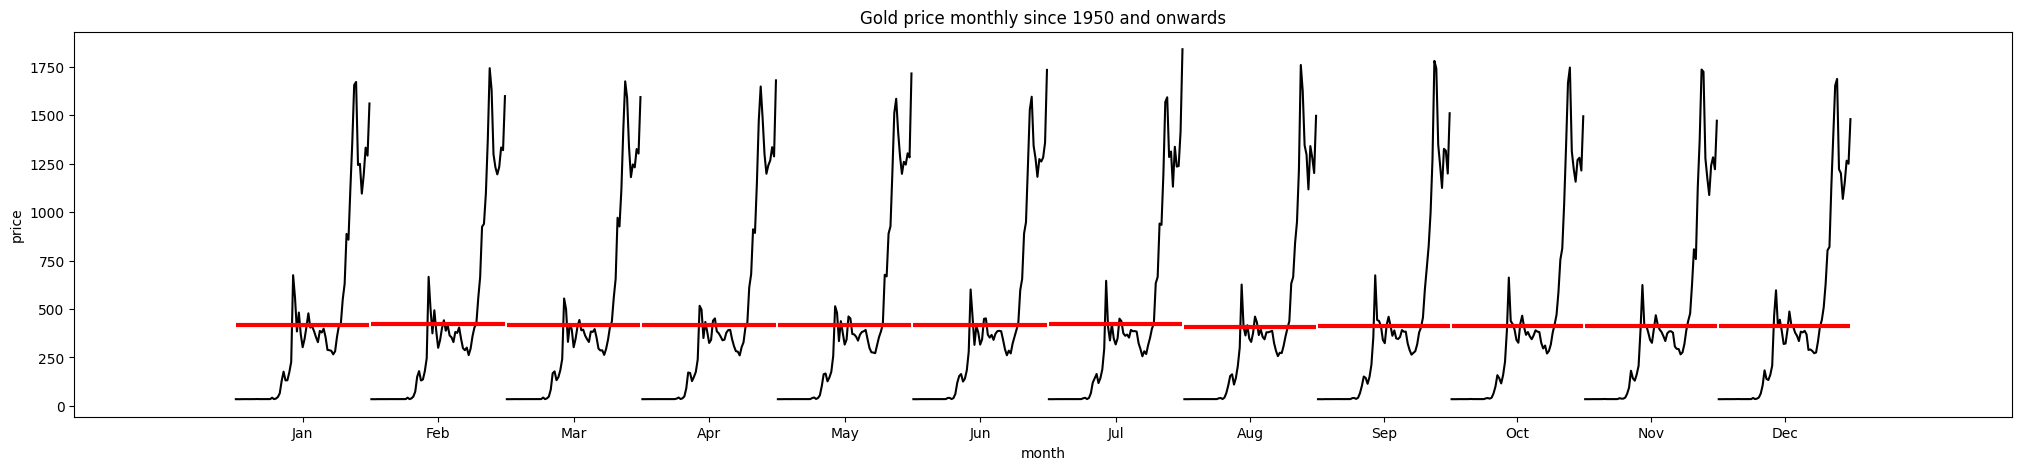

In [15]:
from statsmodels.graphics.tsaplots import month_plot
fig,ax =plt.subplots(figsize=(25,5))
month_plot(df,ax=ax,ylabel ='gold price')
plt.title('Gold price monthly since 1950 and onwards')
plt.xlabel('month')
plt.ylabel('price')
plt.show()

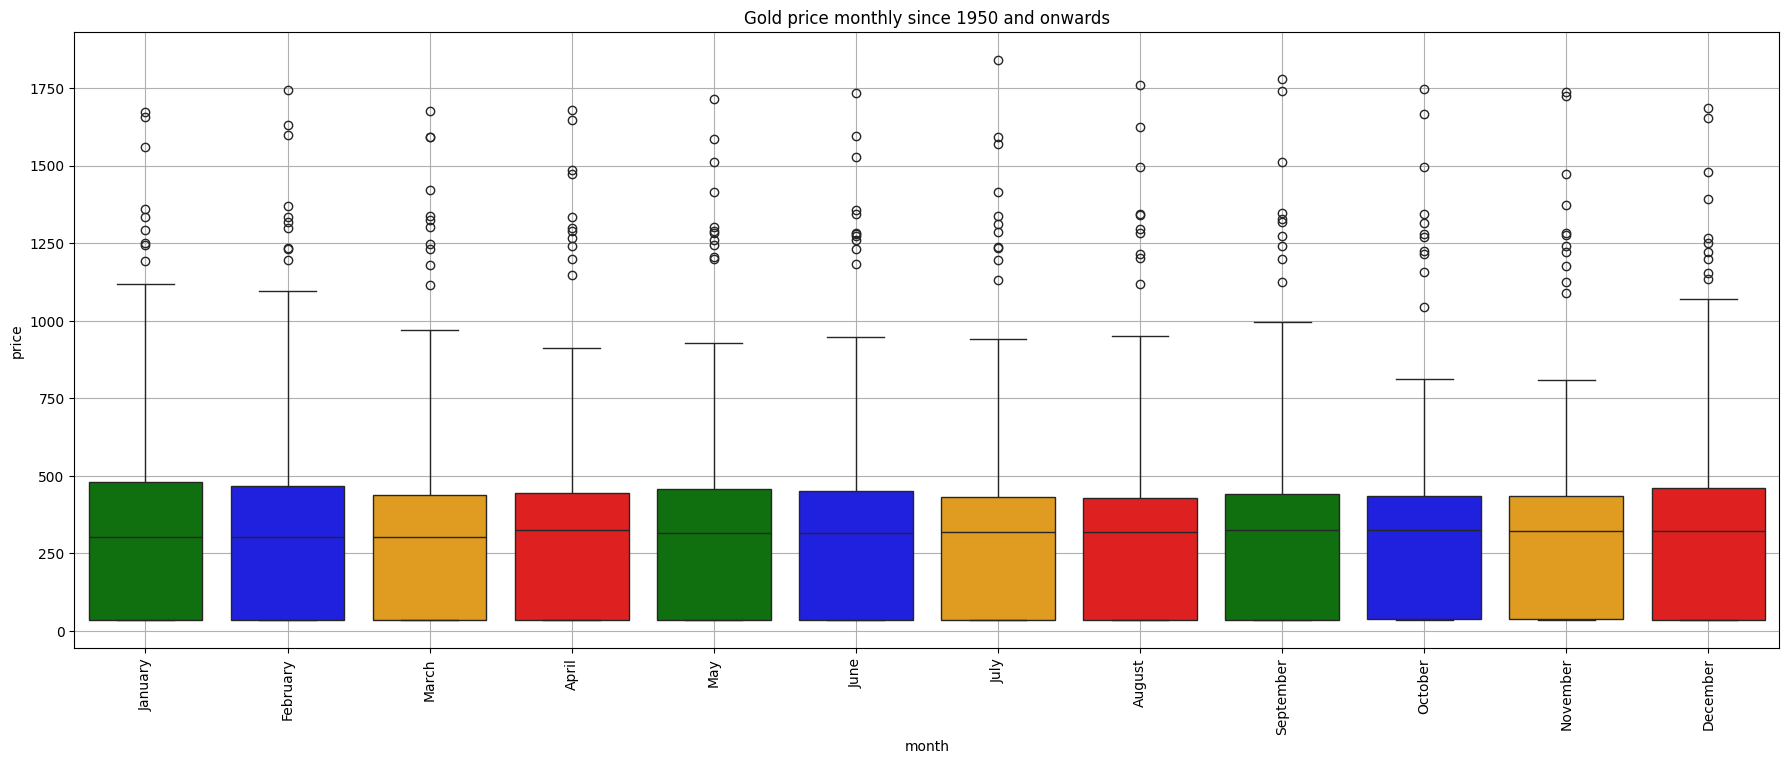

In [16]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x=df.index.month_name(),y=df.values[:,0],ax=ax,palette=['green','blue','orange','red'])
plt.title('Gold price monthly since 1950 and onwards')
plt.xlabel('month')
plt.ylabel('price')
plt.xticks(rotation=90)
plt.grid()
plt.show()

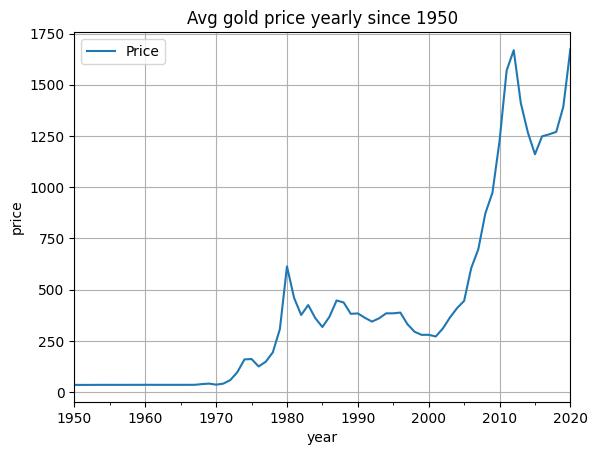

In [17]:
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot()
plt.title('Avg gold price yearly since 1950')
plt.xlabel('year')
plt.ylabel('price')
plt.grid()
plt.show();

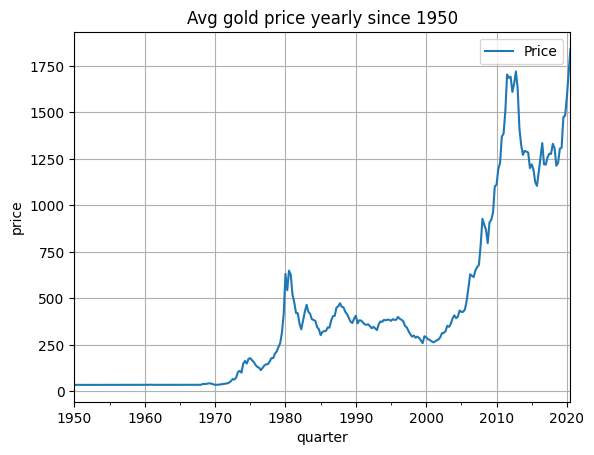

In [18]:
df_quarterly_sum = df.resample('Q').mean()
df_quarterly_sum.plot()
plt.title('Avg gold price yearly since 1950')
plt.xlabel('quarter')
plt.ylabel('price')
plt.grid()
plt.show();

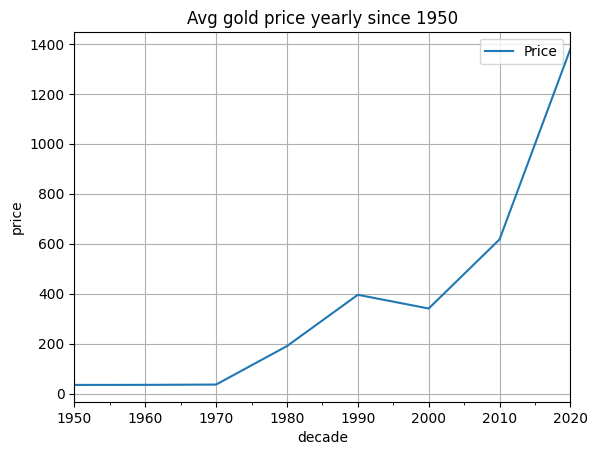

In [19]:
df_decade_sum = df.resample('10Y').mean()
df_decade_sum.plot()
plt.title('Avg gold price yearly since 1950')
plt.xlabel('decade')
plt.ylabel('price')
plt.grid()
plt.show();

In [42]:
# Group by year and calculate the mean, renaming the 'Price' column to 'mean'
df_1 = df.groupby(df.index.year).mean().rename(columns={'Price': 'mean'})

# Merge with the standard deviation, renaming the 'Price' column to 'Std'
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns={'Price': 'Std'}), left_index=True, right_index=True)

# Calculate the coefficient of variation percentage
df_1['Cov_Pct'] = ((df_1['Std'] / df_1['mean']) * 100).round(2)

# Display the result
df_1.head()


,mean,Mean_x,Std,Mean_y,Cov_Pct
month,,,,,
1950,34.729167,416.556906,0.002887,0.0,0.01
1951,34.717500,416.556906,0.020057,0.0,0.06
1952,34.628333,416.556906,0.117538,0.0,0.34
1953,34.879167,416.556906,0.056481,0.0,0.16
1954,35.020000,416.556906,0.082792,0.0,0.24


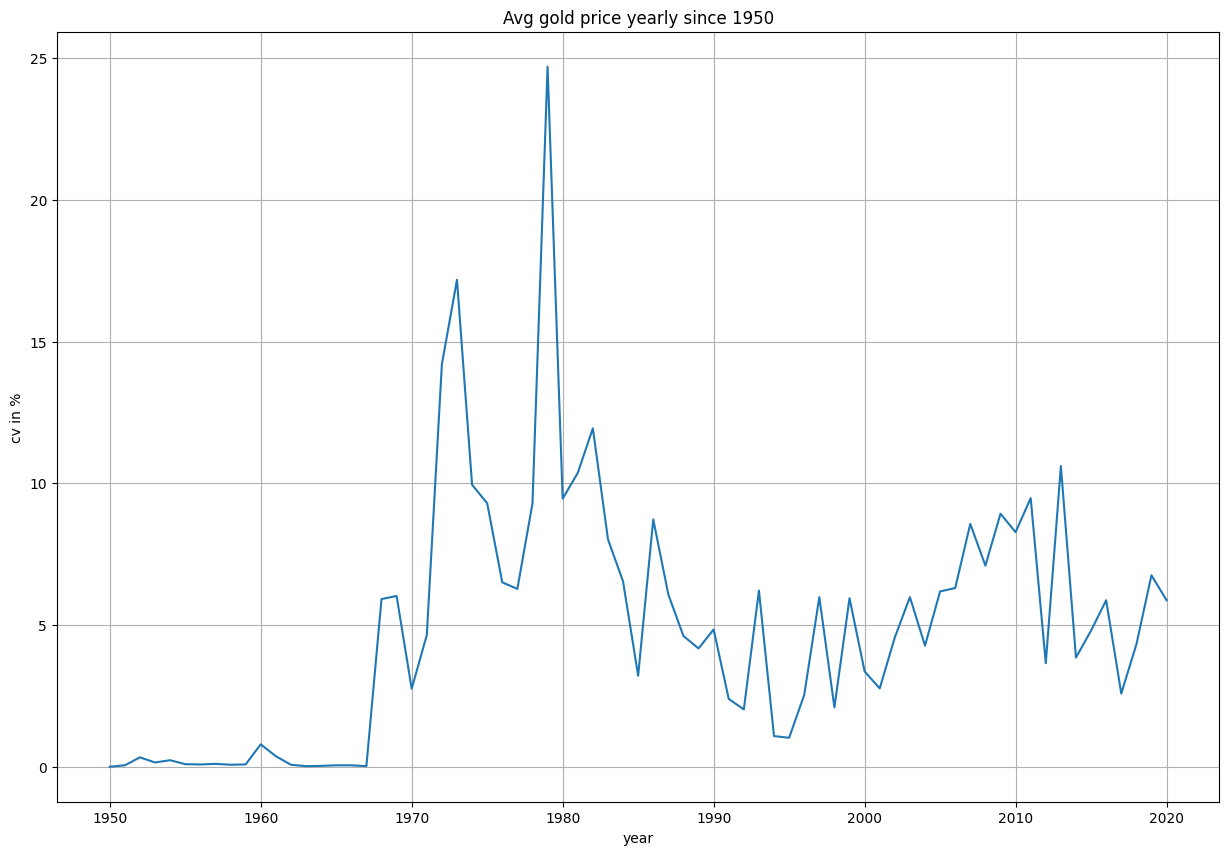

In [45]:
fig,ax=plt.subplots(figsize=(15,10))
df_1['Cov_Pct'].plot()
plt.title('Avg gold price yearly since 1950')
plt.xlabel('year')
plt.ylabel('cv in %')
plt.grid()
plt.show();

In [46]:
train=df[df.index.year <= 2015]
test = df[df.index.year > 2015]

In [47]:
print(train.shape)
print(test.shape)

(792, 2)
(55, 2)


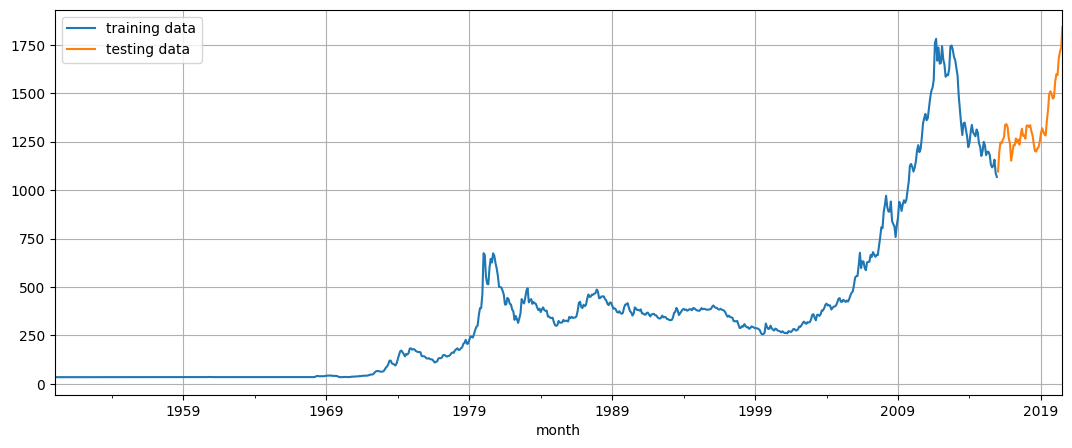

In [49]:
train["Price"].plot(figsize=(13,5))
test["Price"].plot(figsize=(13,5))
plt.grid()
plt.legend(['training data','testing data'])
plt.show()

In [52]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
len(train_time),len(test_time),len(train_time)+len(test_time)

(792, 55, 847)

In [53]:
LR_train = train.copy()
LR_test = test.copy()

In [54]:
LR_train['time']=train_time
LR_test['time']=test_time

In [55]:
lr=LinearRegression()
lr.fit(np.array(LR_train['time']).reshape(-1,1),np.array(LR_train['Price']).reshape(-1,1))

LinearRegression()

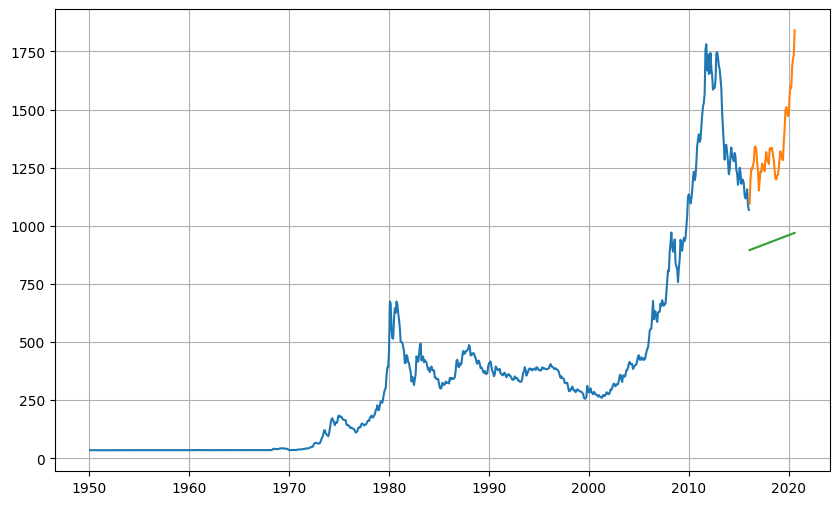

In [58]:
test_predictions_model1 = lr.predict(LR_test[['time']])
LR_test['forecast']= test_predictions_model1
plt.figure(figsize=(10, 6))
plt.plot(train['Price'], label='train')
plt.plot(test['Price'], label='test')
plt.plot(LR_test['forecast'], label='reg on time_test data')
plt.grid()
plt.show()

In [59]:
def mape(actual,pred):
  return round((np.mean(abs(actual-pred)/actual))*100,2)

In [60]:
mape_model1_test = mape(test['Price'].values,test_predictions_model1)
print("MAPE is %3.3f"%(mape_model1_test),"%")

MAPE is 29.630 %


In [61]:
Naive_train = train.copy()
Naive_test = test.copy()

In [62]:
Naive_test['naive']=np.asarray(train['Price'])[len(np.asarray(train['Price']))-1]
Naive_test['naive'].head()

,naive
month,
2016-01-31,1068.317
2016-02-29,1068.317
2016-03-31,1068.317
2016-04-30,1068.317
2016-05-31,1068.317


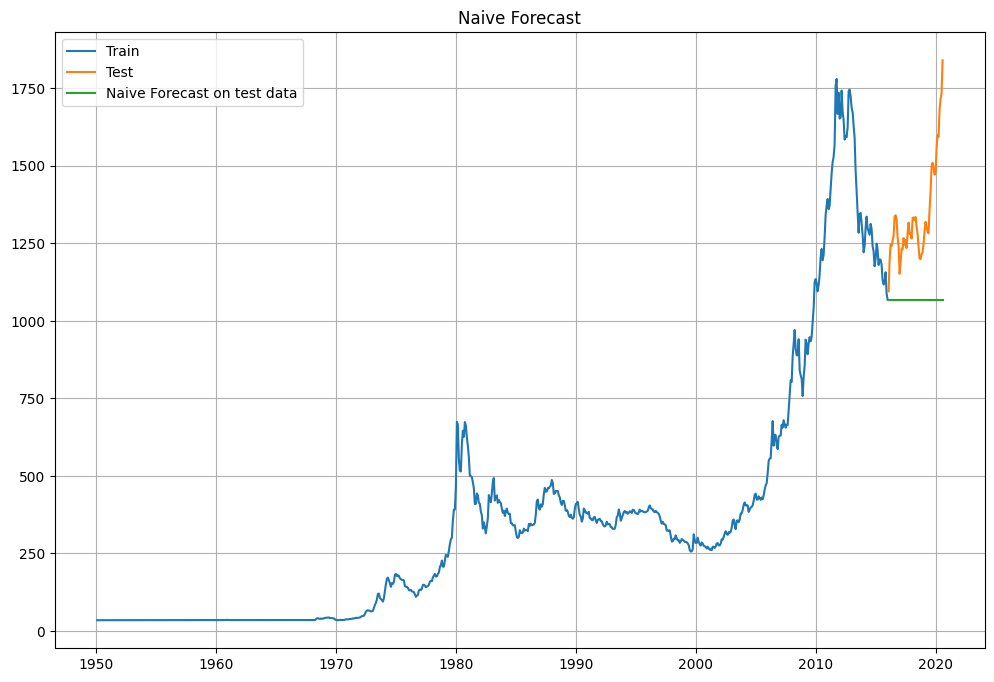

In [63]:
plt.figure(figsize=(12,8))
plt.plot(Naive_train['Price'],label='Train')
plt.plot(test['Price'],label="Test")
plt.plot(Naive_test['naive'],label="Naive Forecast on test data")
plt.legend(loc='best')
plt.title('Naive Forecast')
plt.grid()
plt.legend()
plt.show()


In [65]:
mape_model2_test = mape(test['Price'].values,Naive_test['naive'].values)
print("For naive test forecast on the test data ,MAPE is %3.3f"%(mape_model2_test),"%")

For naive test forecast on the test data ,MAPE is 19.380 %


In [73]:
resultsDf_2 = pd.DataFrame({'Test MAPE (%)': [mape_model2_test]},index=['NaiveModel'])
results= pd.DataFrame({'Test MAPE (%)': [mape_model1_test]},index=['RegressionOnTime'])
results = pd.concat([results,resultsDf_2])
results

,Test MAPE (%)
RegressionOnTime,29.63
NaiveModel,19.38


In [72]:
# Convert the desired column for forecasting to a 1D array
final_model = ExponentialSmoothing(df['Price'],
                                  trend='additive',
                                   seasonal='additive').fit(smoothing_level=0.4,
                                                            smoothing_trend=0.3,
                                                            smoothing_seasonal=0.6)

In [74]:
Mape_final_model=mape(df["Price"].values,final_model.fittedvalues)
print("MAPE:",Mape_final_model)

MAPE: 17.24


In [78]:
prediction = final_model.forecast(steps=len(test))

In [79]:
pred_df = pd.DataFrame({'lower_CI': prediction - 1.96*np.std(final_model.resid,ddof=1),
                        'prediction':prediction,
                        'upper_CI': prediction+ 1.96*np.std(final_model.resid,ddof =1)})
pred_df.head()

,lower_CI,prediction,upper_CI
2020-08-31,1684.720065,1792.871037,1901.022009
2020-09-30,1615.306077,1723.457050,1831.608022
2020-10-31,1538.567922,1646.718895,1754.869867
2020-11-30,1476.758600,1584.909572,1693.060545
2020-12-31,1459.327290,1567.478262,1675.629235


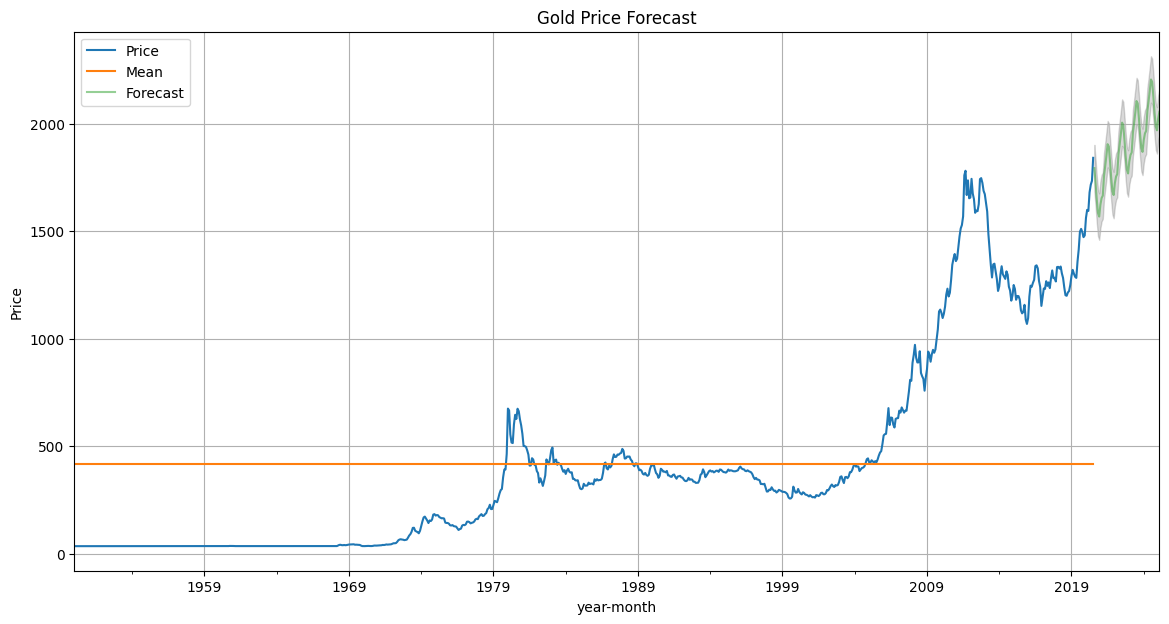

In [80]:
axis=df.plot(label = 'Actual', figsize=(14,7))
pred_df['prediction'].plot(ax=axis, label='Forecast',alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_CI'], color='k', alpha=.15)
axis.set_xlabel('year-month')
axis.set_ylabel('Price')
axis.legend(loc='best')
plt.title('Gold Price Forecast')
plt.grid()
plt.show()